### Author: Diksha Sharma.
#Gripoct22
Data Science and Business Analytics
**Grip @The Sparks Foundation.**

### **Task6: Create the decision tree classifier and visualize it graphically.**




**The purpose is,if we feed any new data to this classifier , it would be able to predict the right class accordingly.**

Dataset: https://bit.ly/3kXTdox

In [38]:
#Importing the Libraries
import numpy as np
import pandas as pd              

#matplotlib and seaborn for visualization.
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns  
import sklearn.datasets as datasets           

#Ignoring the warnings.
import warnings
warnings.filterwarnings('ignore')


### STEP 2- Reading the dataset

In [39]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [40]:
resultdf = pd.DataFrame(iris.target)

In [41]:
tar_df = pd.DataFrame(iris.target_names)
print(tar_df.head(5))

            0
0      setosa
1  versicolor
2   virginica


In [42]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [43]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### STEP 3- Data Preprocessing

In [44]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [46]:
df.shape

(150, 4)

In [47]:
#Checking Nulls
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Step 4- Data Visualization

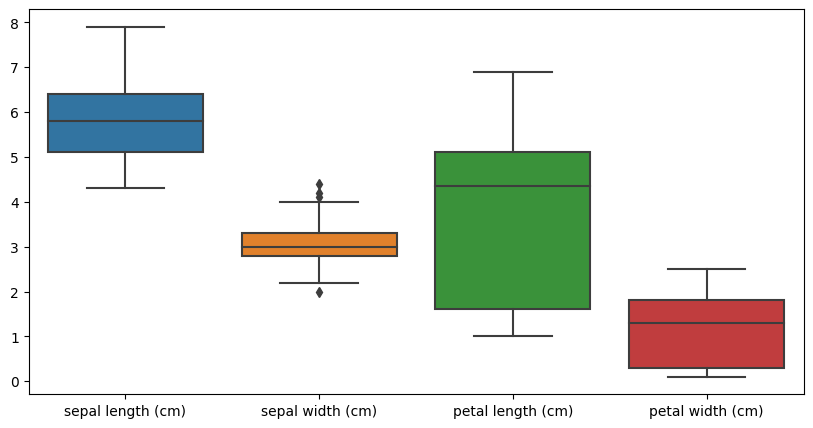

In [48]:
#Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(data = df)
plt.show()

In [49]:
#HeatMap
cor = df.corr()
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


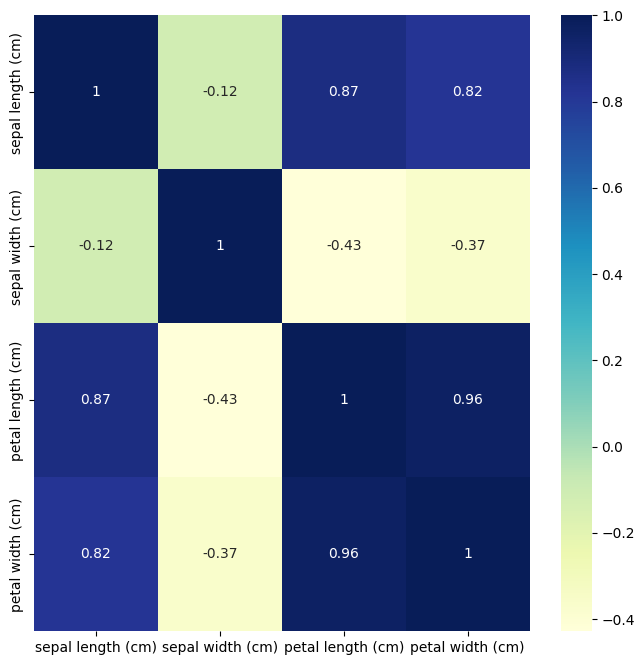

In [50]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Step 5- Data Transformation

We know that Machine Learning does not takes the input as categorical values it takes in the form of numerical values so we need to convert the categorical values to numerical values using LabelEncoder

In [51]:
# df['target'].unique()
tar_df

,0
0,setosa
1,versicolor
2,virginica


In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(resultdf)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [53]:
X = df.iloc[:,0:4]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
Y = df.iloc[:,-1:]
Y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Step 6- Model Building

Scikit-learn’s train_test_split function allow us to shuffle and split the dataset in a single line. The function takes a sequence of arrays (the arrays must be of the same length) and options to specify how to split the arrays. By default, the function extracts 75% of the rows in the arrays as the training set while the remaining 25% of rows is declared as the test set.

Deciding how much data you want to put into the training and the test set respectively is somewhat arbitrary, but using a test set containing 25% of the data is a good rule of thumb.

The function also allow us to control the shuffling applied to the data before applying the split with the option random_state, this ensures reproducible results.

X is having all the independent variables and Y is having dependent variable

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [56]:
X_train.shape

(112, 4)

In [57]:
Y_train.shape

(112, 1)

In [58]:
#Here we are using DecisionTreeClassifier to predict our data After that fitting/training the model on X_train and Y_train by using .fit() method.

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [59]:
#Then we are predicting on X_test by using .predict() method. And checking accuracy how are model is accurate or how it is properly worikng on data
from sklearn.metrics import accuracy_score
prediction = dt.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,prediction))

Accuracy: 0.9736842105263158


In [60]:
from sklearn.metrics import classification_report
print("Report:",classification_report(Y_test,prediction))

Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



For this model, the accuracy on the test set is 0.97, which means the model made the right prediction for 97% of the irises in the given dataset. We can expect the model to be correct 97% of the time for predicting the species of new irises.

In [61]:
clsVars = "Species"
allCols = df.columns
print(clsVars)
# counts
print("\n*** Counts ***")
print(df.groupby(df[clsVars]).size())

Species

*** Counts ***
Species
0    50
1    50
2    50
dtype: int64


In [62]:
from sklearn import tree
text_tree = tree.export_text(dt)
print("\n*** Decision Tree Text ***")
print(text_tree)


*** Decision Tree Text ***
|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  6.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: 2



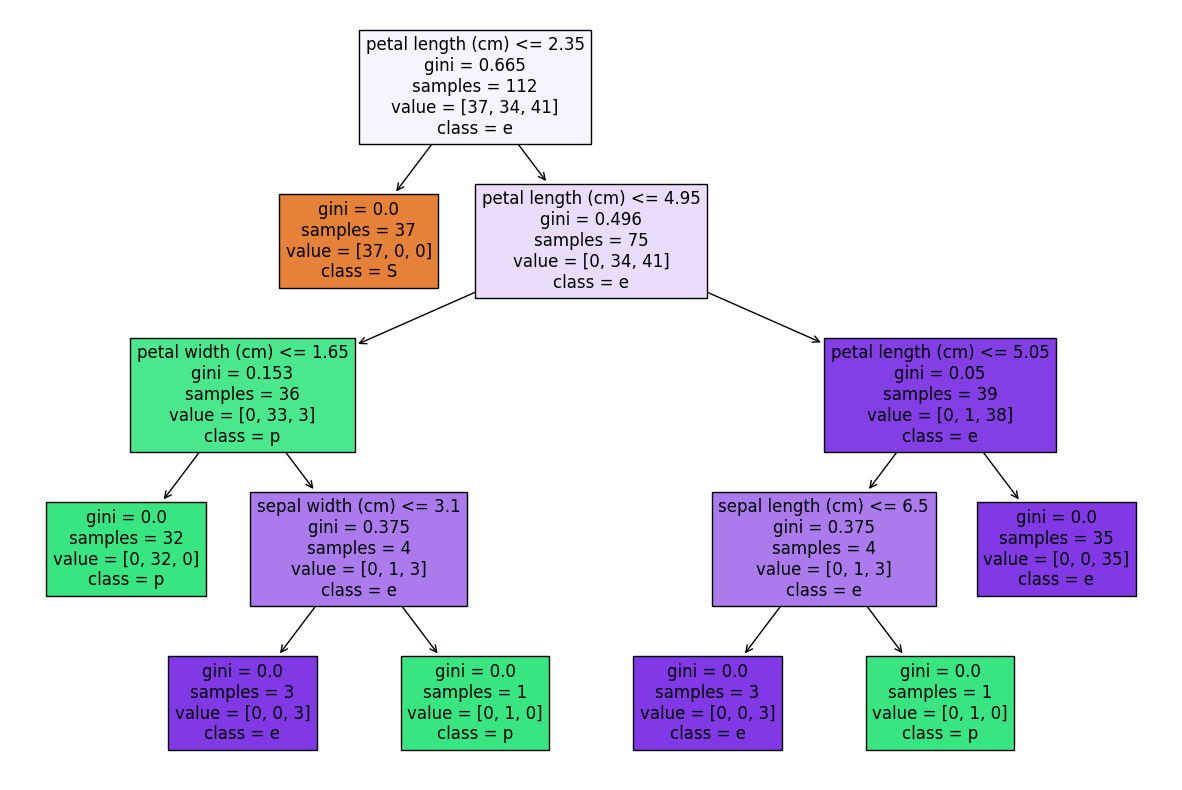

In [63]:
fig = plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=allCols,  class_names=clsVars, filled=True)
plt.show()